In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from matplotlib import pyplot as plt
import seaborn as sns

## Reading Dataset and Cleaning it

In [2]:
agric_df = pd.read_excel("Agriculture data.xlsx", engine="openpyxl")

In [3]:
agric_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [20]:
agric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
agric_df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
X_feature = agric_df.drop(columns=['label'])
Y_label = agric_df["label"]

<Figure size 800x800 with 0 Axes>

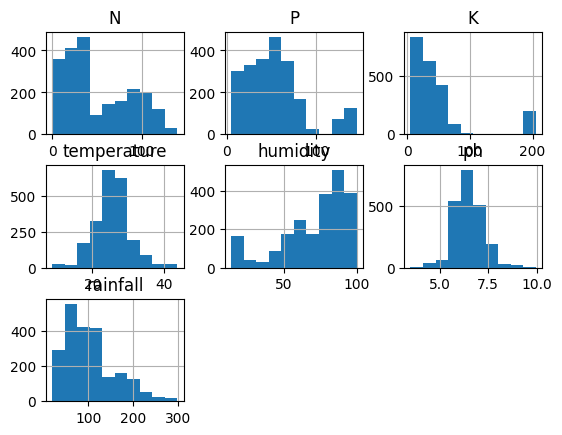

In [7]:
plt.figure(figsize=(8, 8))
agric_df.hist()
plt.show()

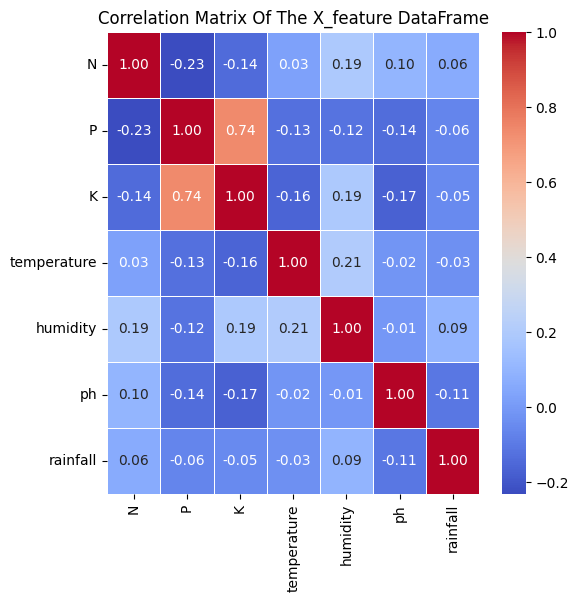

In [8]:
# Plotting a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(X_feature.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Of The X_feature DataFrame")
plt.show()

In [9]:
Y_label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
agric_df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
agric_df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [12]:
print(agric_df.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [13]:
num_cols = agric_df.select_dtypes(include = ["int", "float"])
print(num_cols.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')


- Detecting _Outliers_ in the Data.

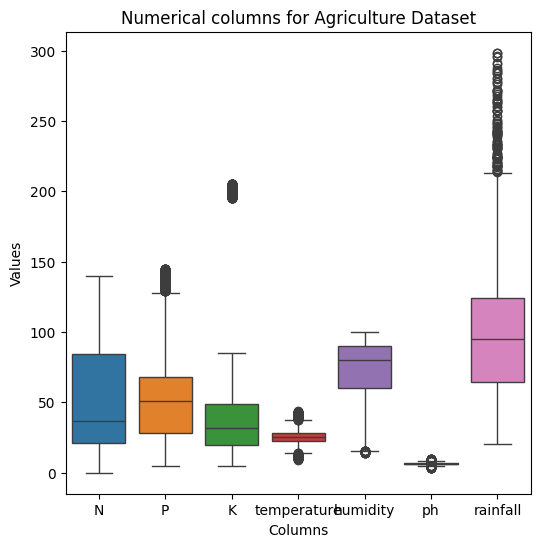

In [14]:
plt.figure(figsize=(6, 6))
sns.boxplot(num_cols)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Numerical columns for Agriculture Dataset")
plt.show()

In [15]:
display(agric_df)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [16]:
def quartiles(col):
    col_data = num_cols[col]
    Q1 = np.percentile(col_data, 25)
    Q3 = np.percentile(col_data, 75)
    IQR = (Q3 - Q1)

    print(f"Interquatiile Range for {col}: {IQR}")

    upper_qt = Q3 + 1.5 * IQR
    lower_qt = Q1 - 1.5 * IQR

    outlier = col_data[(col_data < lower_qt) | (col_data > upper_qt)]
    pc = len(outlier) / len(col_data) * 100
    print(f"Percentage of outliers for {col}: {pc: .2f}%")
    
    no_outliers = num_cols[(col_data >= lower_qt) & (col_data <= upper_qt)]
    
    return no_outliers

In [17]:
new = {}
for column in num_cols.columns:
    new[column] = quartiles(column)

new_df = pd.DataFrame(data = new)
new_df.head()

Interquatiile Range for N: 63.25
Percentage of outliers for N:  0.00%
Interquatiile Range for P: 40.0
Percentage of outliers for P:  6.27%
Interquatiile Range for K: 29.0
Percentage of outliers for K:  9.09%
Interquatiile Range for temperature: 5.792279300000001
Percentage of outliers for temperature:  3.91%
Interquatiile Range for humidity: 29.6868179525
Percentage of outliers for humidity:  1.36%
Interquatiile Range for ph: 0.9519498220000004
Percentage of outliers for ph:  2.59%
Interquatiile Range for rainfall: 59.715821800000015
Percentage of outliers for rainfall:  4.55%


ValueError: If using all scalar values, you must pass an index

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(new_df)
plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Numerical columns for Agriculture Dataset")
plt.show()

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 600x600 with 0 Axes>